# Models Used in Research: Random Forest, C4.5, ANN, Bayesian Tree, SVM, C5.0, Logistic Regression, Naive Bayes, Cox Survival Analysis

In [1]:
import pandas as pd

BreastCancerData = pd.read_csv(r"C:\Users\ricky\Desktop\CAP 6673 Machine Learning\Term_Project\dataR2.csv")
BreastCancerData

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


# Implementation of Chi-Square, ANOVA F-Value, and Mutual Information Feature Selection

In [14]:
%time
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import chi2
# from sklearn.datasets import make_classification
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif

BreastCancerData = pd.read_csv(r"C:\Users\ricky\Desktop\CAP 6673 Machine Learning\Term_Project\dataR2.csv")
# print(BreastCancerData)

print(BreastCancerData.columns.to_list())
Features = BreastCancerData.columns.to_list()[:-1]
Classes = BreastCancerData.columns.to_list()[-1]
print(Features)
print(Classes)
X = BreastCancerData[Features].to_numpy()
y = BreastCancerData[Classes].to_numpy()
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=43)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train)
print(y_test)

#Chi Squared Feature Selection
print()
print('Chi Squared Test Results:')
chi2_statistics, p_values = chi2(X,y)

print(chi2_statistics)
print(p_values)
chi_2_features = []
for values in range(len(chi2_statistics)):
    chi_2_features.append([Features[values],chi2_statistics[values]])
chi_2_features = pd.DataFrame(chi_2_features, columns = ["Features", "Chi_Squared_Ranking"])
chi_2_features = chi_2_features.sort_values(by="Chi_Squared_Ranking", ascending=False)
print(chi_2_features)
chi_2_features_list = chi_2_features['Features'].to_numpy()
print(chi_2_features_list)

#Mutual Information Feature Selection:
print()
print("Mutual Information Test Results:")
mutual_info_stats = mutual_info_classif(X, y, n_neighbors=4)
print(mutual_info_stats)
mutual_info_features = []
for values in range(len(mutual_info_stats)):
    mutual_info_features.append([Features[values],mutual_info_stats[values]])
mutual_info_features = pd.DataFrame(mutual_info_features, columns = ["Features", "Mutual_Info_Ranking"])
mutual_info_features = mutual_info_features.sort_values(by="Mutual_Info_Ranking", ascending=False)
print(mutual_info_features)
mutual_info_features_list = mutual_info_features['Features'].to_numpy()
mutual_info_features_list = mutual_info_features_list[:-3] #The last three features were not prescribed any rank of importance by MI
print(mutual_info_features_list)

#ANOVA F-value Feature Selection
print()
print("ANOVA F-value Selection Test Results:")
f_statistic, p_values = f_classif(X, y)
print(f_statistic)
print(p_values)
ANOVA_F_features = []
for values in range(len(f_statistic)):
    ANOVA_F_features.append([Features[values],f_statistic[values]])
ANOVA_F_features = pd.DataFrame(ANOVA_F_features, columns = ["Features", "ANOVA_F_Ranking"])
ANOVA_F_features = ANOVA_F_features.sort_values(by="ANOVA_F_Ranking", ascending=False)
print(ANOVA_F_features)
ANOVA_F_features_list = ANOVA_F_features['Features'].to_numpy()
print(ANOVA_F_features_list)


# print(BreastCancerData[[BreastCancerData.columns.to_list()[:-1]]])
# print(BreastCancerData[[BreastCancerData.columns.to_list()[-1]]])
# sk.feature_selection.chi2

CPU times: total: 0 ns
Wall time: 0 ns
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']
['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
Classification
[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
(116, 9)

# Model Implementation

# CART Decision Tree

In [213]:
%%time
from sklearn import tree

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = tree.DecisionTreeClassifier(random_state=random)
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = tree.DecisionTreeClassifier(random_state=random)
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = tree.DecisionTreeClassifier(random_state=random)
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


Chi-Square Feature Selection with 1 Features: AUC = 0.4913 (+/-) 0.0
Chi-Square Feature Selection with 2 Features: AUC = 0.4587 (+/-) 0.0306
Chi-Square Feature Selection with 3 Features: AUC = 0.5433 (+/-) 0.0396
Chi-Square Feature Selection with 4 Features: AUC = 0.4862 (+/-) 0.0402
Chi-Square Feature Selection with 5 Features: AUC = 0.5024 (+/-) 0.0418
Chi-Square Feature Selection with 6 Features: AUC = 0.6343 (+/-) 0.0359
Chi-Square Feature Selection with 7 Features: AUC = 0.6444 (+/-) 0.057
Chi-Square Feature Selection with 8 Features: AUC = 0.6444 (+/-) 0.0559
Chi-Square Feature Selection with 9 Features: AUC = 0.6515 (+/-) 0.0537
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.6098 (+/-) 0.0
Mutual Information Feature Selection with 2 Features: AUC 

['Age' 'Glucose' 'Resistin' 'HOMA' 'Leptin']
(116, 5) (116,) (87, 5) (29, 5) (87,) (29,)
0.9655172413793104
0.6896551724137931


[Text(0.421875, 0.9285714285714286, 'Glucose <= 85.5\ngini = 0.485\nsamples = 87\nvalue = [36.0, 51.0]\nclass = cancer'),
 Text(0.1875, 0.7857142857142857, 'Resistin <= 18.362\ngini = 0.363\nsamples = 21\nvalue = [16, 5]\nclass = healthy'),
 Text(0.125, 0.6428571428571429, 'Resistin <= 3.281\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = healthy'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = cancer'),
 Text(0.1875, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = healthy'),
 Text(0.25, 0.6428571428571429, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = cancer'),
 Text(0.65625, 0.7857142857142857, 'Leptin <= 44.989\ngini = 0.422\nsamples = 66\nvalue = [20, 46]\nclass = cancer'),
 Text(0.4375, 0.6428571428571429, 'Age <= 75.0\ngini = 0.33\nsamples = 48\nvalue = [10, 38]\nclass = cancer'),
 Text(0.3125, 0.5, 'Resistin <= 11.927\ngini = 0.21\nsamples = 42\nvalue = [5, 37]\nclass = cancer'),
 Text(0.25, 0.35714285714285715, 'Glucose <= 103.0\ngini =

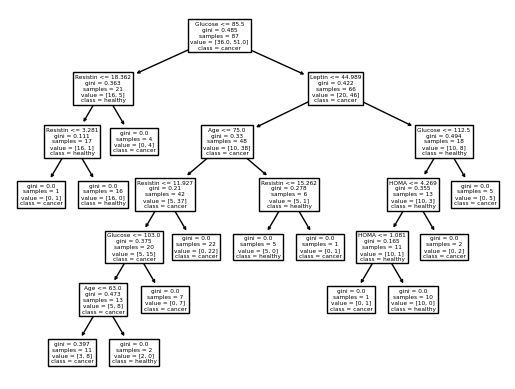

In [159]:
#Visualization of the best performing decision tree:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=6)
X = BreastCancerData[mutual_info_features_list[:5]].to_numpy()
y = BreastCancerData[Classes].to_numpy()    
# auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print(mutual_info_features_list[:5])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=43)
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# print(y_train)
# print(y_test)
clf = clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
tree.plot_tree(clf, feature_names=mutual_info_features_list[:5], class_names=['healthy', 'cancer'])

# SVM

In [26]:
%%time
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import random

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        # clf = svm.SVC(kernel='linear', C=1, random_state=random)
        clf = LinearSVC(dual = 'auto', random_state=random)
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2.0*auc_scores_total.std())
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        # clf = svm.SVC(kernel='linear', C=1, random_state=random)
        clf = LinearSVC(dual = 'auto', random_state=random)
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2.0*auc_scores_total.std())
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        # clf = svm.SVC(kernel='linear', C=1, random_state=random)
        clf = LinearSVC(dual = 'auto', random_state=random)
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2.0*auc_scores_total.std())
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.5251 (+/-) 0.0726440981782589
Chi-Square Feature Selection with 2 Features: AUC = 0.604 (+/-) 0.04608269315128046
Chi-Square Feature Selection with 3 Features: AUC = 0.7405 (+/-) 0.03934390043984398
Chi-Square Feature Selection with 4 Features: AUC = 0.7692 (+/-) 0.04351014725153104
Chi-Square Feature Selection with 5 Features: AUC = 0.7594 (+/-) 0.04871035787537267
Chi-Square Feature Selection with 6 Features: AUC = 0.8028 (+/-) 0.037442448378054376
Chi-Square Feature Selection with 7 Features: AUC = 0.7972 (+/-) 0.0389180788156184
Chi-Square Feature Selection with 8 Features: AUC = 0.7897 (+/-) 0.04024857606328336
Chi-Square Feature Selection with 9 Features: AUC = 0.7833 (+/-) 0.04279785019009795
############################################################################################################################################################################################################################
Mutual Informati

# Random Forests

In [223]:
%%time
from sklearn.ensemble import RandomForestClassifier

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = RandomForestClassifier(random_state=random)
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = RandomForestClassifier(random_state=random)
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = RandomForestClassifier(random_state=random)
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.469 (+/-) 0.021717
Chi-Square Feature Selection with 2 Features: AUC = 0.4904 (+/-) 0.023432
Chi-Square Feature Selection with 3 Features: AUC = 0.637 (+/-) 0.023636
Chi-Square Feature Selection with 4 Features: AUC = 0.6682 (+/-) 0.024649
Chi-Square Feature Selection with 5 Features: AUC = 0.6659 (+/-) 0.023221
Chi-Square Feature Selection with 6 Features: AUC = 0.7291 (+/-) 0.027987
Chi-Square Feature Selection with 7 Features: AUC = 0.7713 (+/-) 0.026163
Chi-Square Feature Selection with 8 Features: AUC = 0.7492 (+/-) 0.028489
Chi-Square Feature Selection with 9 Features: AUC = 0.7555 (+/-) 0.025703
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.6195 (+/-) 0.014304
Mutual Information Feature Select

# Logistic Regression

In [27]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import random

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = LogisticRegression(max_iter= 680, random_state=random) #Maximum iterations for the solvers to converge
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2.0*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = LogisticRegression(max_iter= 680, random_state=random)
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores_total.extend(auc_scores)
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2.0*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = LogisticRegression(max_iter= 680, random_state=random)
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.5243 (+/-) 0.074142
Chi-Square Feature Selection with 2 Features: AUC = 0.6057 (+/-) 0.04381
Chi-Square Feature Selection with 3 Features: AUC = 0.7498 (+/-) 0.03539
Chi-Square Feature Selection with 4 Features: AUC = 0.7698 (+/-) 0.041305
Chi-Square Feature Selection with 5 Features: AUC = 0.7678 (+/-) 0.041966
Chi-Square Feature Selection with 6 Features: AUC = 0.8098 (+/-) 0.037219
Chi-Square Feature Selection with 7 Features: AUC = 0.804 (+/-) 0.038901
Chi-Square Feature Selection with 8 Features: AUC = 0.7945 (+/-) 0.03994
Chi-Square Feature Selection with 9 Features: AUC = 0.7884 (+/-) 0.042269
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.4675 (+/-) 0.113352
Mutual Information Feature Selectio

C:\Users\ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ricky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

ANOVA F-Value Feature Selection with 9 Features: AUC = 0.7884 (+/-) 0.042299
############################################################################################################################################################################################################################
CPU times: total: 13min 53s
Wall time: 13min 58s


# Naive Bayes

In [30]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import random

# def set_random_seed(seed=0):
#     np.random.seed(seed)
#     random.seed(seed)
    
#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        # np.random.seed(random)
        # clf = make_pipeline(StandardScaler(), LinearSVC(dual=True))
        clf = GaussianNB()
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2.0*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = GaussianNB()
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = GaussianNB()
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


Chi-Square Feature Selection with 1 Features: AUC = 0.4788 (+/-) 0.060066
Chi-Square Feature Selection with 2 Features: AUC = 0.6338 (+/-) 0.043401
Chi-Square Feature Selection with 3 Features: AUC = 0.7356 (+/-) 0.033373
Chi-Square Feature Selection with 4 Features: AUC = 0.7479 (+/-) 0.034343
Chi-Square Feature Selection with 5 Features: AUC = 0.7461 (+/-) 0.034438
Chi-Square Feature Selection with 6 Features: AUC = 0.7572 (+/-) 0.035569
Chi-Square Feature Selection with 7 Features: AUC = 0.7855 (+/-) 0.034539
Chi-Square Feature Selection with 8 Features: AUC = 0.7675 (+/-) 0.039871
Chi-Square Feature Selection with 9 Features: AUC = 0.7626 (+/-) 0.040905
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.6764 (+/-) 0.050945
Mutual Information Feature Sele

# Multi Layer Perceptron

In [3]:
%%time
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import random

# # run block of code and catch warnings
# with warnings.catch_warnings():
#  # ignore all caught warnings
#  warnings.filterwarnings("ignore")
#  # execute code that will generate warnings

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(50):
        clf = make_pipeline(StandardScaler(), MLPClassifier(max_iter= 4000, random_state=random))
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2.0*auc_scores_total.std())
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(50):
        clf = make_pipeline(StandardScaler(), MLPClassifier(max_iter=4000, random_state=random))
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        # auc_scores_total.extend(auc_scores)
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2.0*auc_scores_total.std())
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(50):
        clf = make_pipeline(StandardScaler(), MLPClassifier(max_iter= 4000, random_state=random))
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', 2*auc_scores_total.std())
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.4471 (+/-) 0.08180664783675999
Chi-Square Feature Selection with 2 Features: AUC = 0.522 (+/-) 0.06503869054852361
Chi-Square Feature Selection with 3 Features: AUC = 0.6654 (+/-) 0.05492868697088987
Chi-Square Feature Selection with 4 Features: AUC = 0.6841 (+/-) 0.05302143463990964
Chi-Square Feature Selection with 5 Features: AUC = 0.6827 (+/-) 0.05772075814507834
Chi-Square Feature Selection with 6 Features: AUC = 0.7587 (+/-) 0.04819019017769524
Chi-Square Feature Selection with 7 Features: AUC = 0.7968 (+/-) 0.0593487958999709
Chi-Square Feature Selection with 8 Features: AUC = 0.8036 (+/-) 0.05291239581066659
Chi-Square Feature Selection with 9 Features: AUC = 0.7854 (+/-) 0.052783403095352656
############################################################################################################################################################################################################################
Mutual Informat

# kNN

In [29]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import random

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = KNeighborsClassifier()
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2.0*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = KNeighborsClassifier()
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # auc_scores_total.extend(auc_scores)
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2.0*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = KNeighborsClassifier()
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        k_fold = KFold(n_splits=5, shuffle=True, random_state=random)
        auc_scores = cross_val_score(clf, X, y, cv=k_fold, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.4525 (+/-) 0.079206
Chi-Square Feature Selection with 2 Features: AUC = 0.4537 (+/-) 0.082151
Chi-Square Feature Selection with 3 Features: AUC = 0.4765 (+/-) 0.084809
Chi-Square Feature Selection with 4 Features: AUC = 0.4747 (+/-) 0.084661
Chi-Square Feature Selection with 5 Features: AUC = 0.4764 (+/-) 0.084945
Chi-Square Feature Selection with 6 Features: AUC = 0.4813 (+/-) 0.084748
Chi-Square Feature Selection with 7 Features: AUC = 0.4966 (+/-) 0.079066
Chi-Square Feature Selection with 8 Features: AUC = 0.481 (+/-) 0.08111
Chi-Square Feature Selection with 9 Features: AUC = 0.4837 (+/-) 0.082461
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.6769 (+/-) 0.055156
Mutual Information Feature Select

# AdaBoost Classifier

In [3]:
%%time
from sklearn.ensemble import AdaBoostClassifier

#Number of features selected from Chi-Square ranking:
for feats in range(len(chi_2_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=random)
        X = BreastCancerData[chi_2_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()    
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Chi-Square Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
  
print('######################'*10)
#Number of features selected from Mutual Information ranking:
for feats in range(len(mutual_info_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=random)
        X = BreastCancerData[mutual_info_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        auc_scores_total.append(auc_scores.mean())
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    auc_scores_total = np.array(auc_scores_total)
    print('Mutual Information Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)


#Number of features selected from ANOVA F-Value ranking:
for feats in range(len(ANOVA_F_features_list)):
    auc_scores_total = []
    for random in range(500):
        clf = AdaBoostClassifier(n_estimators=50, algorithm="SAMME", random_state=random)
        X = BreastCancerData[ANOVA_F_features_list[:feats+1]].to_numpy()
        y = BreastCancerData[Classes].to_numpy()
        auc_scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
        # accuracy_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        auc_scores_total.append(auc_scores.mean())
    auc_scores_total = np.array(auc_scores_total)
    print('ANOVA F-Value Feature Selection with',X.shape[1],'Features: AUC =', round(auc_scores_total.mean(),4), '(+/-)', round(2*auc_scores_total.std(),6))
    
print('######################'*10)



Chi-Square Feature Selection with 1 Features: AUC = 0.448 (+/-) 0.0
Chi-Square Feature Selection with 2 Features: AUC = 0.5734 (+/-) 0.0
Chi-Square Feature Selection with 3 Features: AUC = 0.6747 (+/-) 0.0
Chi-Square Feature Selection with 4 Features: AUC = 0.7347 (+/-) 0.006818
Chi-Square Feature Selection with 5 Features: AUC = 0.7363 (+/-) 0.008332
Chi-Square Feature Selection with 6 Features: AUC = 0.7393 (+/-) 0.023473
Chi-Square Feature Selection with 7 Features: AUC = 0.7909 (+/-) 0.00303
Chi-Square Feature Selection with 8 Features: AUC = 0.7614 (+/-) 0.003785
Chi-Square Feature Selection with 9 Features: AUC = 0.7633 (+/-) 0.007575
############################################################################################################################################################################################################################
Mutual Information Feature Selection with 1 Features: AUC = 0.6877 (+/-) 0.0
Mutual Information Feature Selection with 2 Features:

# Performance Visualizations

In [15]:
chi_2_features

,Features,Chi_Squared_Ranking
8,MCP.1,214.917039
3,Insulin,89.203820
2,Glucose,88.125373
7,Resistin,61.949833
4,HOMA,45.656784
1,BMI,1.847119
0,Age,0.988417
6,Adiponectin,0.200949
5,Leptin,0.001849


In [1]:
import Model_Data_Format as MD 
import pandas as pd
# print(MD.Model_Data.model_lists['Decision Tree'])
# print(MD.Model_Data.ChiSquare)
Chi = MD.Model_Data.ChiSquare
for c in Chi.columns:
    Chi[c] = Chi[c].str[:18]
# Chi.to_csv(r'C:/Users/ricky/Desktop/CAP 6673 Machine Learning/Term_Project/ChiSquareData.csv')
Chi

,Decision Tree,SVM,Random Forests,Logistic Regression,Naive Bayes,Multi Layer Perceptron,kNN,AdaBoost
0,0.4913 (+/-) 0.0,0.5251 (+/-) 0.072,0.469 (+/-) 0.0217,0.5243 (+/-) 0.074,0.4788 (+/-) 0.060,0.4471 (+/-) 0.081,0.4525 (+/-) 0.079,0.448 (+/-) 0.0
1,0.4587 (+/-) 0.030,0.604 (+/-) 0.0460,0.4904 (+/-) 0.023,0.6057 (+/-) 0.043,0.6338 (+/-) 0.043,0.522 (+/-) 0.0650,0.4537 (+/-) 0.082,0.5734 (+/-) 0.0
2,0.5433 (+/-) 0.039,0.7405 (+/-) 0.039,0.637 (+/-) 0.0236,0.7498 (+/-) 0.035,0.7356 (+/-) 0.033,0.6654 (+/-) 0.054,0.4765 (+/-) 0.084,0.6747 (+/-) 0.0
3,0.4862 (+/-) 0.040,0.7692 (+/-) 0.043,0.6682 (+/-) 0.024,0.7698 (+/-) 0.041,0.7479 (+/-) 0.034,0.6841 (+/-) 0.053,0.4747 (+/-) 0.084,0.7347 (+/-) 0.006
4,0.5024 (+/-) 0.041,0.7594 (+/-) 0.048,0.6659 (+/-) 0.023,0.7678 (+/-) 0.041,0.7461 (+/-) 0.034,0.6827 (+/-) 0.057,0.4764 (+/-) 0.084,0.7363 (+/-) 0.008
5,0.6343 (+/-) 0.035,0.8028 (+/-) 0.037,0.7291 (+/-) 0.027,0.8098 (+/-) 0.037,0.7572 (+/-) 0.035,0.7587 (+/-) 0.048,0.4813 (+/-) 0.084,0.7393 (+/-) 0.023
6,0.6444 (+/-) 0.057,0.7972 (+/-) 0.038,0.7713 (+/-) 0.026,0.804 (+/-) 0.0389,0.7855 (+/-) 0.034,0.7968 (+/-) 0.059,0.4966 (+/-) 0.079,0.7909 (+/-) 0.003
7,0.6444 (+/-) 0.055,0.7897 (+/-) 0.040,0.7492 (+/-) 0.028,0.7945 (+/-) 0.039,0.7675 (+/-) 0.039,0.8036 (+/-) 0.052,0.481 (+/-) 0.0811,0.7614 (+/-) 0.003
8,0.6515 (+/-) 0.053,0.7833 (+/-) 0.042,0.7555 (+/-) 0.025,0.7884 (+/-) 0.042,0.7626 (+/-) 0.040,0.7854 (+/-) 0.052,0.4837 (+/-) 0.082,0.7633 (+/-) 0.007


In [2]:
for model in Chi.columns:
    Chi[model] = Chi[model].str.split().str[0].astype('float')
Chi.index = Chi.index + 1

<Axes: title={'center': 'Comparative Performance Analysis for Chi-Square Feature Selection Ranking'}, xlabel='Number of Features Selected by Chi-Square Ranking', ylabel='Average AUC'>

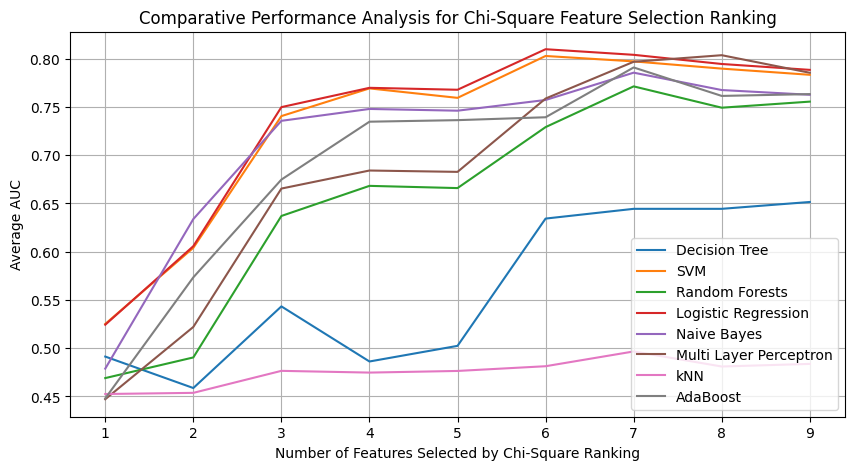

In [3]:
Chi.plot(figsize = (10,5), title = 'Comparative Performance Analysis for Chi-Square Feature Selection Ranking', ylabel = 'Average AUC', xlabel = 'Number of Features Selected by Chi-Square Ranking', grid = True)

In [16]:
mutual_info_features

,Features,Mutual_Info_Ranking
0,Age,0.121419
2,Glucose,0.093410
7,Resistin,0.038398
4,HOMA,0.031227
3,Insulin,0.002506
5,Leptin,0.002395
1,BMI,0.000000
6,Adiponectin,0.000000
8,MCP.1,0.000000


In [4]:
import pandas as pd
import Model_Data_Format as MD 
# print(MD.Model_Data.model_lists['Decision Tree'])
# print(MD.Model_Data.ChiSquare)
MD.Model_Data.MutualInfo
MI = MD.Model_Data.MutualInfo
for c in MI.columns:
    MI[c] = MI[c].str[:18]
# MI.to_csv(r'C:/Users/ricky/Desktop/CAP 6673 Machine Learning/Term_Project/MutualInfoData.csv')
MI

,Decision Tree,SVM,Random Forests,Logistic Regression,Naive Bayes,Multi Layer Perceptron,kNN,AdaBoost
0,0.6098 (+/-) 0.0,0.4625 (+/-) 0.114,0.6195 (+/-) 0.014,0.4675 (+/-) 0.113,0.6764 (+/-) 0.050,0.7042 (+/-) 0.043,0.6769 (+/-) 0.055,0.6877 (+/-) 0.0
1,0.6888 (+/-) 0.025,0.7492 (+/-) 0.032,0.7645 (+/-) 0.017,0.7636 (+/-) 0.031,0.783 (+/-) 0.0323,0.825 (+/-) 0.0296,0.7564 (+/-) 0.044,0.7753 (+/-) 0.0
2,0.6708 (+/-) 0.041,0.7744 (+/-) 0.039,0.8415 (+/-) 0.017,0.7818 (+/-) 0.038,0.8003 (+/-) 0.037,0.8156 (+/-) 0.054,0.8278 (+/-) 0.043,0.8296 (+/-) 0.0
3,0.663 (+/-) 0.0467,0.7699 (+/-) 0.040,0.7873 (+/-) 0.020,0.7776 (+/-) 0.039,0.8045 (+/-) 0.034,0.7803 (+/-) 0.049,0.8282 (+/-) 0.043,0.8198 (+/-) 0.014
4,0.6917 (+/-) 0.032,0.79 (+/-) 0.03994,0.8011 (+/-) 0.022,0.7987 (+/-) 0.038,0.7963 (+/-) 0.037,0.7954 (+/-) 0.044,0.8053 (+/-) 0.043,0.789 (+/-) 0.0136
5,0.6673 (+/-) 0.031,0.7885 (+/-) 0.042,0.7638 (+/-) 0.023,0.7953 (+/-) 0.039,0.791 (+/-) 0.0363,0.791 (+/-) 0.0463,0.795 (+/-) 0.0421,0.8071 (+/-) 0.018


In [5]:
for model in MI.columns:
    MI[model] = MI[model].str.split().str[0].astype('float')
MI.index = MI.index + 1

<Axes: title={'center': 'Comparative Performance Analysis for Mutual Information Feature Selection Ranking'}, xlabel='Number of Features Selected by Mutual Information Ranking', ylabel='Average AUC'>

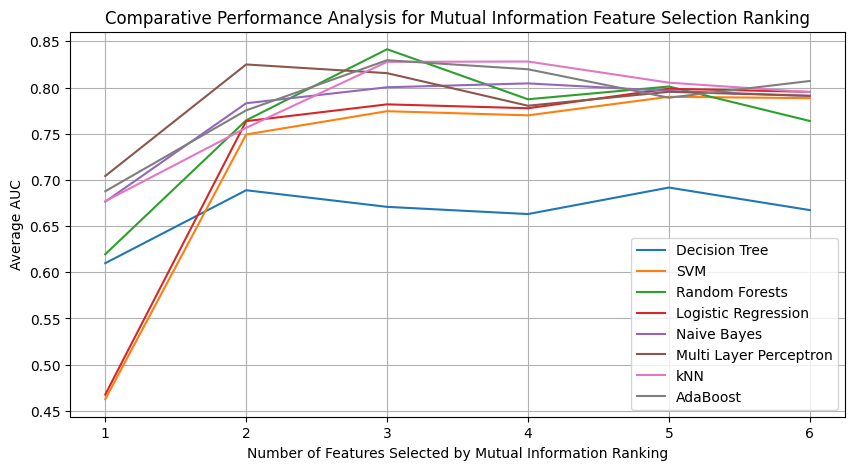

In [6]:
MI.plot(figsize = (10,5), title = 'Comparative Performance Analysis for Mutual Information Feature Selection Ranking', ylabel = 'Average AUC', xlabel = 'Number of Features Selected by Mutual Information Ranking', grid = True)

In [17]:
ANOVA_F_features

,Features,ANOVA_F_Ranking
2,Glucose,19.755454
4,HOMA,10.002398
3,Insulin,9.459504
7,Resistin,6.211315
1,BMI,2.039862
8,MCP.1,0.959962
0,Age,0.216670
6,Adiponectin,0.043322
5,Leptin,0.000133


In [7]:
import pandas as pd
import Model_Data_Format as MD 
# print(MD.Model_Data.model_lists['Decision Tree'])
# print(MD.Model_Data.ChiSquare)
AN = MD.Model_Data.ANOVA
for c in AN.columns:
    AN[c] = AN[c].str[:18]
# AN.to_csv(r'C:/Users/ricky/Desktop/CAP 6673 Machine Learning/Term_Project/ANOVAFValueData.csv')
AN


,Decision Tree,SVM,Random Forests,Logistic Regression,Naive Bayes,Multi Layer Perceptron,kNN,AdaBoost
0,0.5791 (+/-) 0.0,0.7644 (+/-) 0.025,0.604 (+/-) 0.0196,0.7644 (+/-) 0.025,0.7304 (+/-) 0.027,0.7596 (+/-) 0.029,0.6742 (+/-) 0.057,0.6998 (+/-) 0.0
1,0.5676 (+/-) 0.026,0.7582 (+/-) 0.029,0.6243 (+/-) 0.020,0.7629 (+/-) 0.030,0.7689 (+/-) 0.027,0.7585 (+/-) 0.032,0.682 (+/-) 0.0530,0.673 (+/-) 0.0
2,0.5591 (+/-) 0.029,0.7509 (+/-) 0.037,0.6185 (+/-) 0.018,0.7609 (+/-) 0.031,0.7682 (+/-) 0.027,0.7465 (+/-) 0.043,0.714 (+/-) 0.0504,0.6876 (+/-) 0.0
3,0.51 (+/-) 0.0299,0.7767 (+/-) 0.044,0.6601 (+/-) 0.021,0.7817 (+/-) 0.038,0.7697 (+/-) 0.033,0.7339 (+/-) 0.061,0.759 (+/-) 0.0425,0.7486 (+/-) 0.009
4,0.6385 (+/-) 0.035,0.815 (+/-) 0.0330,0.7284 (+/-) 0.025,0.8242 (+/-) 0.033,0.7816 (+/-) 0.033,0.7884 (+/-) 0.051,0.7742 (+/-) 0.040,0.7358 (+/-) 0.008
5,0.6368 (+/-) 0.035,0.8029 (+/-) 0.037,0.7284 (+/-) 0.026,0.8098 (+/-) 0.037,0.7572 (+/-) 0.035,0.7591 (+/-) 0.049,0.4813 (+/-) 0.084,0.7399 (+/-) 0.023
6,0.6453 (+/-) 0.057,0.7973 (+/-) 0.039,0.7722 (+/-) 0.025,0.804 (+/-) 0.0388,0.7855 (+/-) 0.034,0.7959 (+/-) 0.052,0.4966 (+/-) 0.079,0.7909 (+/-) 0.003
7,0.6437 (+/-) 0.054,0.7896 (+/-) 0.040,0.7497 (+/-) 0.027,0.7945 (+/-) 0.039,0.7675 (+/-) 0.039,0.8045 (+/-) 0.049,0.481 (+/-) 0.0811,0.7613 (+/-) 0.003
8,0.6526 (+/-) 0.056,0.7833 (+/-) 0.043,0.756 (+/-) 0.0267,0.7884 (+/-) 0.042,0.7626 (+/-) 0.040,0.7861 (+/-) 0.053,0.4837 (+/-) 0.082,0.7636 (+/-) 0.007


In [8]:
for model in AN.columns:
    AN[model] = AN[model].str.split().str[0].astype('float')
AN.index = AN.index + 1

<Axes: title={'center': 'Comparative Performance Analysis for ANOVA F - Value Feature Selection Ranking'}, xlabel='Number of Features Selected by ANOVA F - Value Ranking', ylabel='Average AUC'>

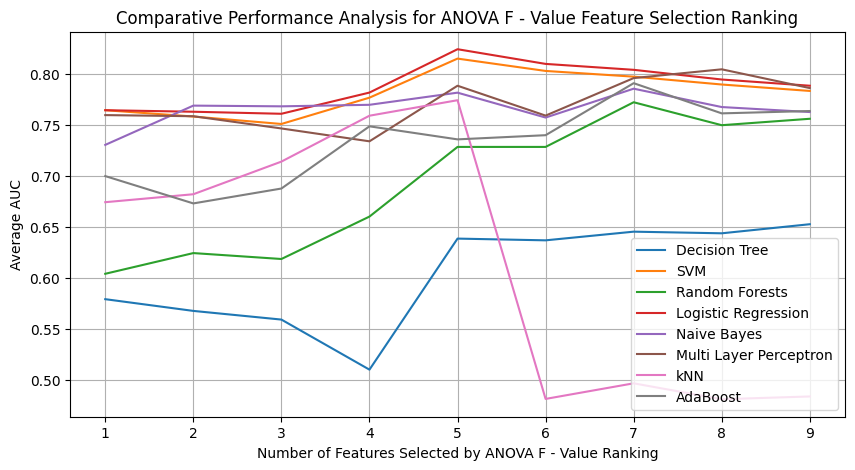

In [9]:
AN.plot(figsize = (10,5), title = 'Comparative Performance Analysis for ANOVA F - Value Feature Selection Ranking', ylabel = 'Average AUC', xlabel = 'Number of Features Selected by ANOVA F - Value Ranking', grid = True)